# <span style = "color :  #ca6f1e ">Activité Python : Dynamique des populations - Modèle d'Euler et Malthus </span>

Tu trouveras dans ce module python les fonctions qui nous ont permis de simuler des épidémies, puis des activités complémentaires qui permettent d'aller un peu plus loin que ce qu'on a vu en vidéo.

Tu peux naviguer librement dans ce notebook en suivant les instructions. N'hésite pas à te familiariser avec le code et les différentes notions.

### I. Croissance géométrique d'une population

On commence simplement par reprendre une croissance géométrique de la population. Tout ce qui est précédé ou entouré d'un # dans le code est un commentaire qui est là pour t'aider à comprendre l'algorithme.

Commence par lire le code ci-dessous et essaie de bien le comprendre. Une fois que c'est bon, tu peux exécuter la cellule et jouer avec les différents paramètres.

In [5]:
import matplotlib.pyplot as plt

#On définit une fonction "croissance_geometrique" qui prend en entrée les paramètres de la population
#et qui affiche la croissance au cours du temps

def croissance_geometrique(p0,q,N):
    #P est une liste contenant toutes les tailles successives de la population, p_n=P[n]
    P=[p0]

    ##############
    #   Calcul   #
    ##############

    #On créé une boucle for qui permet de calculer les termes successifs de p_n selon la relation p_k=q*p_(k-1)
    for k in range (1,N+1):
        p_k=P[-1]*q
        P.append(p_k)
        #On aurait aussi pu faire P.append(p0*q**k)

    ##############
    # Affichage  # 
    ##############

    #On peut ensuite afficher les valeurs de p_n.
    plt.plot(P, linewidth=3,color='black',label='population')
    plt.ticklabel_format(style='plain')
    plt.xlabel("Années")
    plt.ylabel("Taille de la population")
    plt.title("Evolution de la population pour p0="+str(p0)+" et q="+str(q),y=1.05)
    plt.show() 


##############
# Paramètres #
##############

#p0 représente la population initiale
p0=10
#q représente la raison de la suite géométrique
q=0.7
#N représente le nombre d'années maximal qu'on considère, si N=50, on regarde l'évolution sur 50 ans
N=9

#On appelle la fonction définie précédemment avec les paramètres choisis
croissance_geometrique(p0,q,N)

#Exécute la cellule une première fois puis change les paramètres p0, q et N pour voir leurs effets respectifs.


<Figure size 640x480 with 1 Axes>

####  <span style="color:blue">Module ipwidgets</span>
Comme tu le remarques, il est assez fastidieux de modifier les paramètres systématiquement dans le code pour obtenir de nouvelles simulations. Pour plus de simplicité, on utilise un module de Python *ipywidgets* qui permet de changer les paramètres avec un curseur plutôt que dans le code. Il suffit de choisir les paramètres puis de cliquer sur "Run Interact". On peut alors voir la simulation et changer à nouveau les paramètres en actualisant à chaque fois via le bouton "Run Interact".

In [6]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

p0 = widgets.IntSlider(min=0, max=100, value=10, description='p0')
q = widgets.FloatSlider(min=0, max=2, value=1.05, description='q')
N = widgets.IntSlider(min=1, max=1000, value=50, description='N')

widgets.interact_manual(croissance_geometrique, p0=p0, q=q, N=N)

interactive(children=(IntSlider(value=10, description='p0'), FloatSlider(value=1.05, description='q', max=2.0)…

<function __main__.croissance_geometrique(p0, q, N)>

### II. Croissance géométrique limitée par la croissance arithmétique des ressources

On définit désormais une fonction "croissance_ressources" qui prend en entrée les paramètres de la population et qui affiche la croissance au cours du temps en tenant compte des limitations des ressource. Essaie de comprendre le code et joue ensuite avec les paramètres.

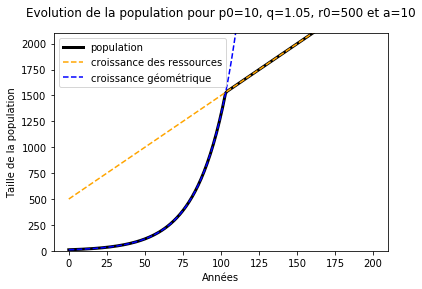

In [7]:


def croissance_ressources(p0,q,r0,a,N):
    #P est une liste contenant toutes les tailles successives de la population, p_n=P[n]
    P=[p0]
    
    #Pour une meilleure compréhension, on affiche aussi la suite géométrique classique et la croissance des ressources
    # en pointillés
    
    #R contient les valeurs de la suite arithmétique des ressources
    R=[r0]
    #Q contient les valeurs de la suite géométrique
    Q=[p0]

    ##############
    #   Calcul   #
    ##############

    #On créé une boucle for qui permet de calculer les termes successifs de p_n en prenant le minimum
    # entre q*p_(n-1) et r_(n)=n*a+r0
    for k in range (1,N+1):
        p_k=min(P[-1]*q,k*a+r0)
        P.append(p_k)
        
        R.append(r0+a*k)
        Q.append(p0*q**k)

    ##############
    # Affichage  #
    ##############

    #On peut ensuite afficher les valeurs de p_n.
    plt.plot(P, linewidth=3,color='black',label='population')
    plt.plot(R,'--',color='orange',label='croissance des ressources')
    plt.plot(Q,'--',color='blue',label='croissance géométrique')
    plt.xlabel("Années")
    plt.legend()
    plt.ticklabel_format(style='plain')
    plt.ylabel("Taille de la population")
    plt.ylim(0,10*N+100)
    plt.title("Evolution de la population pour p0="+str(p0)+", q="+str(q)+", r0="+str(r0)+" et a="+str(a),y=1.05)
    plt.show()


##############
# Paramètres #
##############

#p0 représente la population initiale
p0=10
#q représente la raison de la suite géométrique
q=1.05
#a représente la raison de la suite arithmétique des ressources
a=10
#r0 représente la valeur initiale des ressources
r0=500
#N représente le nombre d'année maximal qu'on considère, si N=50, on regarde l'évolution sur 50 ans
N=200

#On appelle la fonction définit précédemment avec les paramètres qu'on a choisit
croissance_ressources(p0,q,r0,a,N)

#Tu peux exécuter la cellule plusieurs fois en changeant les paramètres à chaque fois pour voir leur effet respectif.


Encore une fois, on ajoute un module qui permet de changer les paramètres directement sans avoir à exécuter la cellule à chaque fois.

In [8]:
p0 = widgets.IntSlider(min=0, max=100, value=10, description='p0')
q = widgets.FloatSlider(min=0, max=2, value=1.1, description='q')
r0 = widgets.FloatSlider(min=1, max=100, value=50, description='r0')
a = widgets.FloatSlider(min=1, max=10, value=5, description='a')
N = widgets.IntSlider(min=1, max=1000, value=50, description='N')

widgets.interact(croissance_ressources, p0=p0, q=q, r0=r0, a=a, N=N)

interactive(children=(IntSlider(value=10, description='p0'), FloatSlider(value=1.1, description='q', max=2.0),…

<function __main__.croissance_ressources(p0, q, r0, a, N)>

### III. Exercice pratique

On peut tester notre nouveau modèle sur des données réelles, en l'occurrence la démographie française entre 1945 et 2015. Le but de l'exercice suivant est de trouver les paramètres $c, a_0$ et $r_0$ qui permettent de simuler le plus précisement possible l'évolution de la population française. Essayez de modifier ces paramètres via les curseurs pour obtenir une courbe qui colle aux points de données rouges. On précise que $c$ est le taux de croissance de la population exprimé en pourcentage. Ainsi, $q=1+\frac{c}{100}$. \
<span style="color:green">Remarque : le code ci-dessous est beaucoup plus avancé. Tu peux ne pas tout comprendre, ce n'est pas grave. L'important ici est de pouvoir utiliser la simulation pour estimer les paramètres d'évolution d'une population. Tu pourras relire ce code un peu plus tard lorsque tu auras progressé en Python !</span>

In [9]:
population_fr=[39660000, 41429000, 43428000, 45684000, 47758000, 50772000, 52699000, 
               53880000, 55284000, 56709000, 57844000, 59549000, 61182000, 62765000, 64300000]
annees=[1945+k*5 for k in range(0,15)]


def exercice(c,r0,a):
    q=1+c/100
    p0=39660000
    P=[p0]
    R=np.array([r0+a*k for k in range(71)])
    Q=np.array([p0*q**k for k in range(71)])
    P=np.zeros(71)
    n=np.argmax(R<Q)
    if Q[-1]<R[-1]:
        n=71
    P[:n]=Q[:n]
    P[n:]=R[n:]
    absc=[1945+k for k in range(71)]
    plt.plot(absc,P, linewidth=3,color='black',label='population')
    plt.plot(absc,R,'--',color='orange',label='croissance des ressources')
    plt.plot(absc,Q,'--',color='blue',label='croissance géométrique')
    plt.xlabel("Années")
    plt.ylim(39660000,68000000)
    plt.ticklabel_format(style='plain')
    plt.ylabel("Taille de la population")
    plt.title("Evolution de la population pour p0="+str(p0)+", q="+str(q)+", r0="+str(r0)+" et a="+str(a),y=1.05)
    plt.scatter(annees,population_fr,color='red',label='données')
    plt.ticklabel_format(style='plain')
    plt.legend()
    plt.show()


c = widgets.FloatSlider(min=0, max=2, value=1.4, description='c')
r0 = widgets.IntSlider(min=39660000, max=68000000, value=50000000, description='r0')
a = widgets.IntSlider(min=100000, max=500000, value=200000, description='a')

widgets.interact_manual(exercice, c=c, r0=r0, a=a)



interactive(children=(FloatSlider(value=1.4, description='c', max=2.0), IntSlider(value=50000000, description=…

<function __main__.exercice(c, r0, a)>

### <span style="color : green">Exercice 1</span> 

Joue avec les paramètres jusqu'à ce que les 2 courbes soient à peu près superposées. Les "bons" paramètres à trouver se trouvent ci-dessous, je te conseille donc de ne pas regarder la suite avant d'avoir essayé de trouver seul les "bons" paramètres.

### IV. Variante du modèle de Malthus : ressources non périssables

Jusqu'à maintenant, on a implicitement supposé que les ressources non utilisées sur une année n'étaient pas utilisables pour l'année suivante, mais on peut tout à fait faire l'hypothèse que les ressources sont non périssables et qu'elles peuvent se conserver ! 

Avant de regarder la suite, quel va être à ton avis le nouveau comportement de la population ? Qu'est-ce que cela change ? 

Il faut tout d'abord traduire notre hypothèse en langage mathématique. 
On a toujours $p_n=\min (q*p_{n-1},r_n)$, mais cette fois, $r_n=(na+r_0)+(r_{n-1}-p_{n-1})$. Le premier terme correspond à la production de ressource annuelle comme tout à l'heure qui croit de manière arithmétique. Le deuxième terme correspond aux ressources de l'année dernière qui n'ont pas été consommée par la population. Avec ces formules, on peut lancer des simulations pour observer ce qu'il se passe.

In [10]:

#On définit une fonction "croissance_ressources" qui prend en entrée les paramètres de la population
#et qui affiche la croissance au cours du temps en tenant compte de la croissance des ressources

def variante_malthus(p0,q,r0,a,N):
    #P est une liste contenant toutes les tailles successives de la population, p_n=P[n]
    P=[p0]
    #R contient les valeurs de la suite arithmétique des ressources
    R=[r0]
    #Q contient les valeurs de la suite géométrique
    Q=[p0]
    for n in range (1,N+1):
        nouveau_terme=(R[-1]-P[-1]) 
        r_n=n*a+r0+nouveau_terme
        p_n=min(P[-1]*q,r_n)
        P.append(p_n)
        R.append(r_n)
        Q.append(p0*q**n)
        
    ##############
    # Affichage  #
    ##############
    plt.plot(P, linewidth=3,color='black',label='population')
    plt.plot(R,'--',color='orange',label='ressources disponibles')
    plt.plot(Q,'--',color='blue',label='croissance géométrique')
    plt.xlabel("Années")
    plt.ylim(0,max(R)+100)
    plt.legend()
    plt.ticklabel_format(style='plain')
    plt.ylabel("Taille de la population")
    plt.title("Evolution de la population pour p0="+str(p0)+", q="+str(q)+", r0="+str(r0)+" et a="+str(a),y=1.05)
    plt.show()
    

p0 = widgets.IntSlider(min=0, max=100, value=10, description='p0')
q = widgets.FloatSlider(min=0, max=2, value=1.2, description='q')
r0 = widgets.FloatSlider(min=1, max=100, value=50, description='r0')
a = widgets.FloatSlider(min=1, max=10, value=5, description='a')
N = widgets.IntSlider(min=1, max=1000, value=50, description='N')

widgets.interact_manual(variante_malthus, p0=p0, q=q, r0=r0, a=a, N=N)


interactive(children=(IntSlider(value=10, description='p0'), FloatSlider(value=1.2, description='q', max=2.0),…

<function __main__.variante_malthus(p0, q, r0, a, N)>

Le comportement devient alors très intéressant. Comme précédemment, on a initialement une croissance géométrique jusqu'à ce que la population atteigne ses capacités en ressources. Mais cette fois ci, comme les ressources ont été économisées au fil des années, on a une décroissance de la population sur un certain temps car en fait cette dernière vit au-delà de ses moyens ! Elle ne fait que profiter des ressources mises de côté, mais cela ne peut pas durer éternellement ! La population décroit alors jusqu'à pouvoir se satisfaire de sa production annuelle de ressources. A partir de ce moment, la croissance se fait comme précédemment, au même rythme que la croissance arithmétique des ressources.

### Variante du modèle de Malthus : des meurtres dans la population !

Pour terminer, on peut regarder ce qu'il se passe si on fait l'hypothèse qu'une partie de la population s'entretue... On oublie les ressources et on suppose que la population croît toujours de manière géométrique, à ceci près que chaque année, une part de la population meurt (soit parce-qu'il y a des meurtres ou que trop d'humains induisent une pollution toxique par exemple). En language mathématique, on va par exemple supposer que :
$$ p_{n+1}=q \ p_n-\frac{m}{1000} \ p_{n}^2$$
avec $m$ un paramètre qui contrôle la mortalité.
Le terme négatif $-\frac{m}{1000} \ p_{n}^2$ correspond donc à ce phénomène de mortalité qui croît comme le carré de la population (c'est une hypothèse, il y a d'autres façons d'introduire un terme de mortalité).

### <span style="color : green">Exercice 2</span>

Qu'est-ce que cela peut donner en termes de simulation à ton avis ? Est-ce que la population peut tendre vers l'infinie ? Peut-elle s'éteindre ?

Essaie de programmer ta propre fonction qui modélise cette évolution de population afin de répondre à cette question !

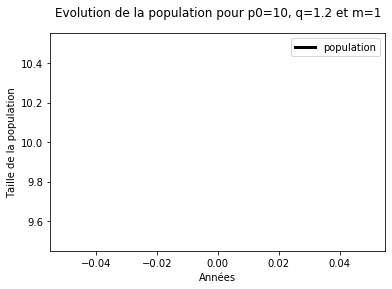

In [11]:
def variante_mortalite_exercice(p0,q,m,N):
    #P est une liste contenant toutes les tailles successives de la population, p_n=P[n]
    P=[p0]
    #On veut remplir les N premières valeurs de P ! (Indice : il faudra une boucle for)
    
    
    
    
    # à toi de remplir ces lignes #
    
    
    
    #On a préparé ci-dessous le code permettant l'affichage graphique de la simulation    
    plt.plot(P, linewidth=3,color='black',label='population')
    plt.xlabel("Années")
    plt.legend()
    plt.ticklabel_format(style='plain')
    plt.ylabel("Taille de la population")
    plt.title("Evolution de la population pour p0="+str(p0)+", q="+str(q)+" et m="+str(m),y=1.05)
    plt.show()
    
variante_mortalite_exercice(10,1.2,1,50)

## <span style="color : red">Correction Exercice 1</span>


Pour l'exercice sur la démographie francaise, tu devrais trouver à peu près ces paramètres : c=1, r0=45 000 000, a=270 000. Evidemment, il n'y a pas de valeur exacte, donc pas de soucis si tu n'as pas exactement les mêmes nombres.

## <span style="color : red">Correction Exercice 2</span>

Le code qui suit est la correction. Ne la regarde pas avant de chercher toi-même, mais tu peux t'en inspirer si jamais tu bloques après plusieurs minutes de recherche. Il y a une infinité de façons de coder un même algorithme, ne t'inquiètes pas si tu n'as pas exactement la même chose. Une fois que tu as trouvé, compare les résultats d'une simulation avec un jeu de paramètre donné provenant des 2 codes pour vérifier que tu as la bonne réponse.

In [12]:
def variante_mortalite(p0,q,m,N):
    #P est une liste contenant toutes les tailles successives de la population, p_n=P[n]
    P=[p0]
    
    for n in range (1,N+1):
        p_n=q*P[-1]-m/1000*P[-1]**2
        P.append(p_n)
        
    plt.plot(P, linewidth=3,color='black',label='population')
    plt.xlabel("Années")
    plt.legend()
    plt.ticklabel_format(style='plain')
    plt.ylabel("Taille de la population")
    plt.title("Evolution de la population pour p0="+str(p0)+", q="+str(q)+" et m="+str(m),y=1.05)
    plt.show()

p0 = widgets.IntSlider(min=0, max=100, value=10, description='p0')
q = widgets.FloatSlider(min=0, max=2, value=1.2, description='q')
m = widgets.FloatSlider(min=0, max=5, value=1, description='M')
N = widgets.IntSlider(min=1, max=100, value=50, description='N')

widgets.interact_manual(variante_mortalite, p0=p0, q=q, m=m, N=N)
        

interactive(children=(IntSlider(value=10, description='p0'), FloatSlider(value=1.2, description='q', max=2.0),…

<function __main__.variante_mortalite(p0, q, m, N)>

On remarque qu'avec ce modèle, la population atteint un niveau d'équilibre ! Cela permet donc de rendre compte des démographies qui ont commencé par grossir jusqu'à atteindre un plateau. On a d'ailleurs posé les bases du modèle de Verhulst qu'on étudie plus en détails dans le prochain module !

Question bonus : en supposant vrai le fait que la suite $p_n$ converge vers une limite $l$ et qu'on a la relation $ p_{n+1}=q \ p_n-\frac{m}{1000} \ p_{n}^2$, peut-on trouver une formule pour $l$ en fonction de $q$ et de $m$ ?